# Segmentación por umbralización

In [8]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.util import random_noise
from skimage.filters import threshold_local

# Cargar imagen

In [9]:
objects_image = cv2.imread('images/OBJECTS.png', cv2.IMREAD_GRAYSCALE)

In [10]:
def show_histogram(image, values=256):
  histogram, bin_edges = np.histogram(image, bins=values, range=(0, values-1))
  fig, ax = plt.subplots()
  ax.set_title("Grayscale Histogram")
  ax.set_xlabel("grayscale value")
  ax.set_ylabel("pixel count")
  ax.set_xlim([0.0, values-1])

  ax.plot(bin_edges[0:-1], histogram)
  plt.show()

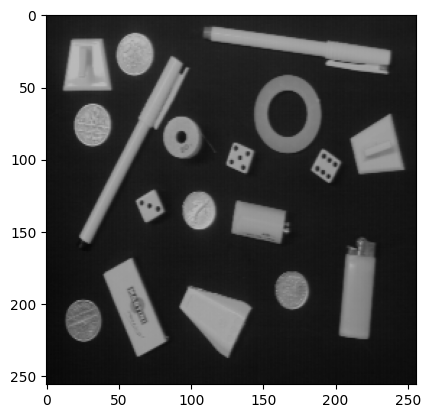

In [11]:
plt.imshow(objects_image, cmap='gray', vmin=0, vmax=255)
plt.show()

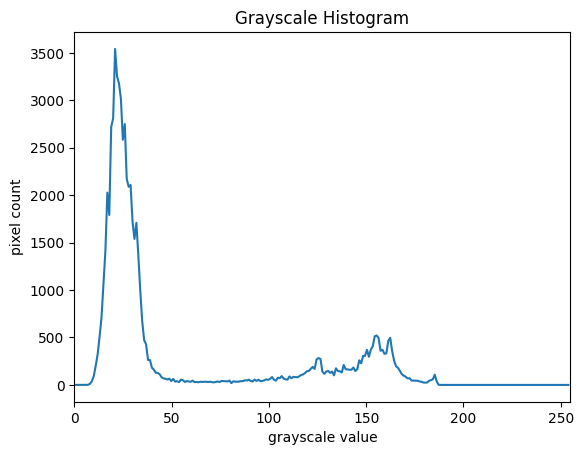

In [56]:
show_histogram(objects_image)

## Umbralización Global - Objects

In [57]:
thres_value_1, thres_image_1 = cv2.threshold(objects_image, 50, 255,cv2.THRESH_BINARY)

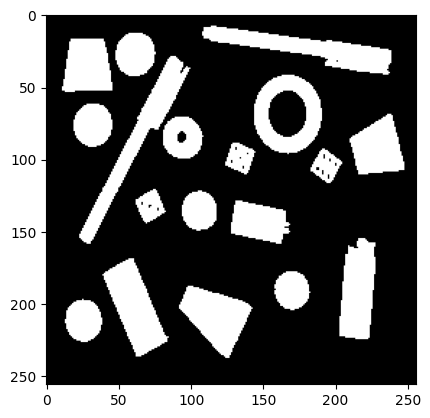

In [58]:
plt.imshow(thres_image_1, cmap='gray', vmin=0, vmax=255)

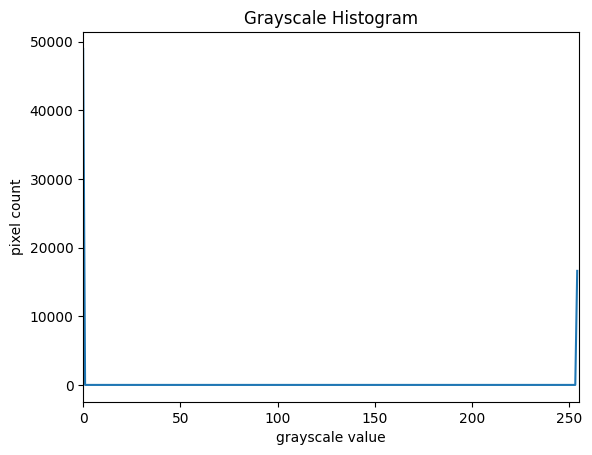

In [59]:
show_histogram(thres_image_1)

## Umbralización Otsu - Objects

In [60]:
thres_value_2, thres_image_2 = cv2.threshold(objects_image, 0, 100, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

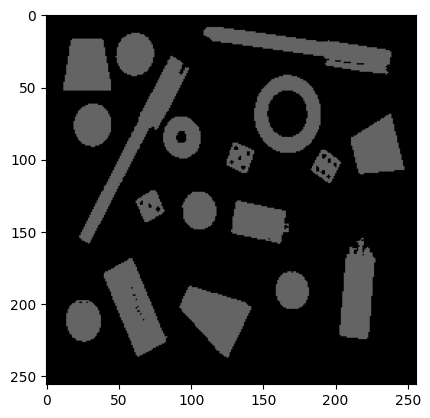

In [61]:
plt.imshow(thres_image_2, cmap='gray', vmin=0, vmax=255)

## Adición de ruido - Varianza 0.05

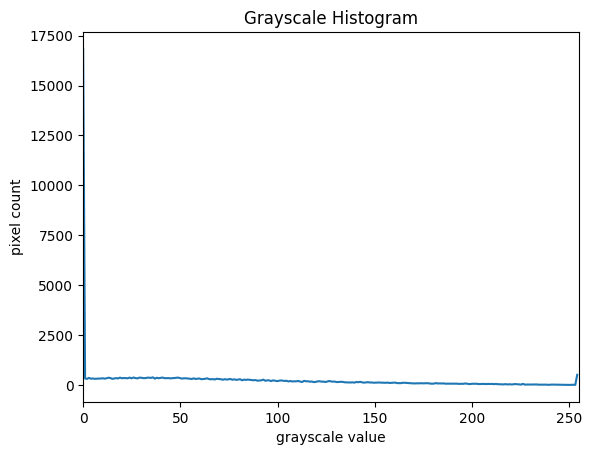

In [62]:
noised_image_var_1 = random_noise(objects_image, mode='gaussian', mean=0, var=0.05)
noised_image = noised_image_var_1 * 255
show_histogram(noised_image)

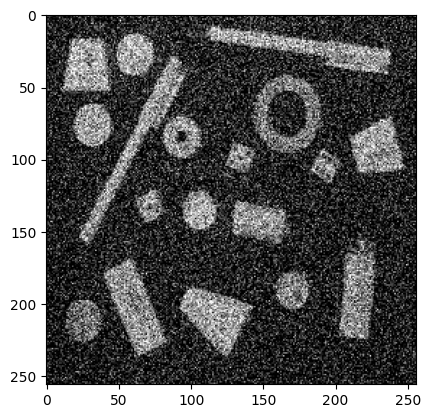

In [63]:
plt.imshow(noised_image, cmap='gray', vmin=0, vmax=255)

## Adición de ruido - Varianza 0.001 

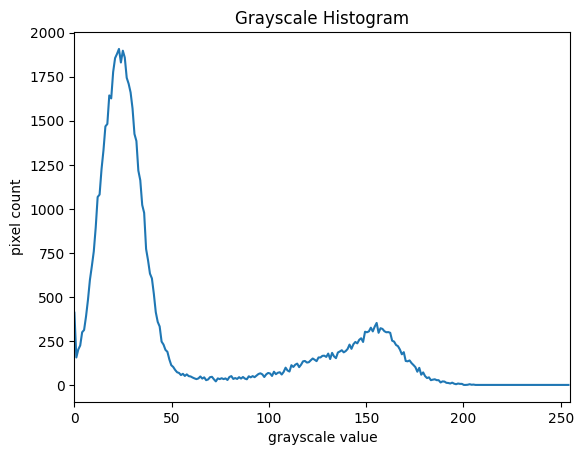

In [64]:
noised_image_var_2 = random_noise(objects_image, mode='gaussian', mean=0, var=0.001)
noised_image_2 = noised_image_var_2 * 255
show_histogram(noised_image_2)

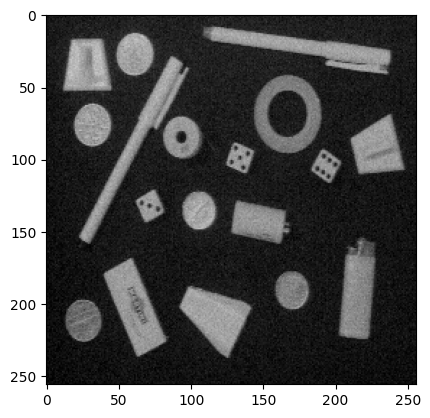

In [65]:
plt.imshow(noised_image_2, cmap='gray', vmin=0, vmax=255)

### *¿Qué sucede? ¿Por qué sucede esto?*

Al introducir ruido gaussiano aditivo con varianza de 0.001 y 0.05, la detección de contornos se ve afectada en distintos grados. Con 0.001, la imagen conserva mejor los detalles, aunque el ruido sigue siendo perceptible. En cambio, con 0.05, el ruido es más intenso, generando una textura rugosa que altera la uniformidad de la imagen y dificulta la identificación precisa de los contornos. El ruido gaussiano se genera al añadir valores aleatorios distribuidos normalmente con una media de cero y una desviación estándar (σ) a los datos de entrada, lo que produce variaciones aleatorias en la intensidad de los píxeles.
 








## Umbralizaciones sobre las imagenes generadas con ruido

### Umbralizaciones globales

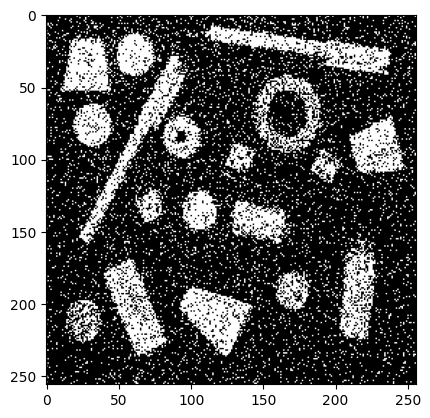

In [ ]:
thres_value_3, thres_image_3 = cv2.threshold(noised_image, 100, 255, cv2.THRESH_BINARY)
plt.imshow(thres_image_3, cmap='gray', vmin=0, vmax=255)

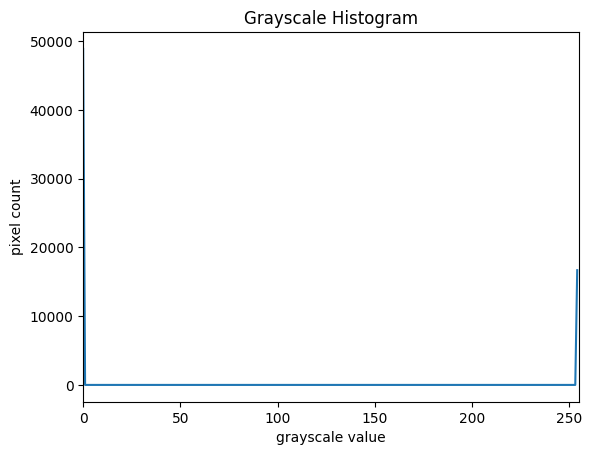

In [67]:
show_histogram(thres_image_3)

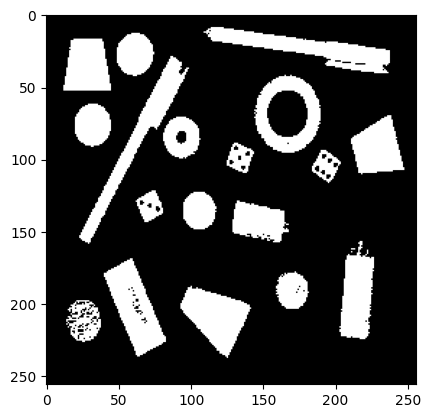

In [69]:
thres_value_4, thres_image_4 = cv2.threshold(noised_image_2, 100, 255, cv2.THRESH_BINARY)
plt.imshow(thres_image_4, cmap='gray', vmin=0, vmax=255)

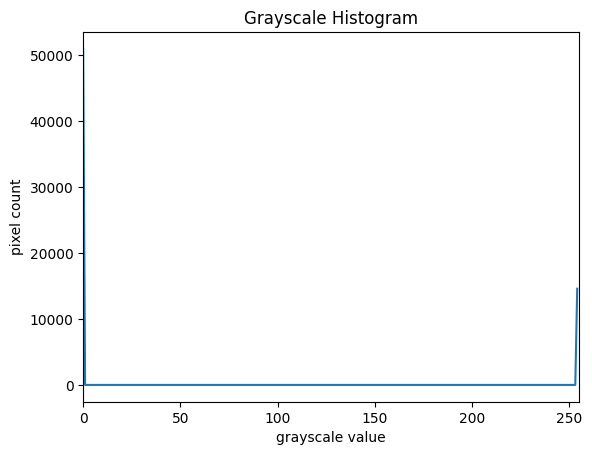

In [70]:
show_histogram(thres_image_4)

### Umbralizaciones otsu

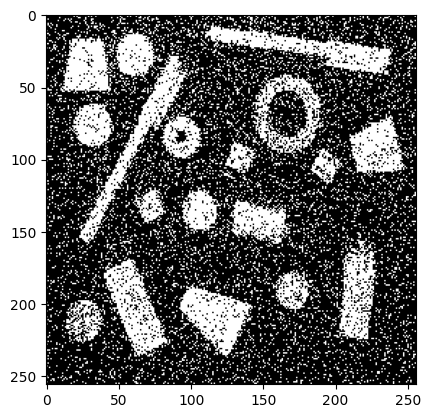

In [78]:
thres_value_5, thres_image_5 = cv2.threshold(noised_image.astype(np.uint8), 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(thres_image_5, cmap='gray', vmin=0, vmax=255)

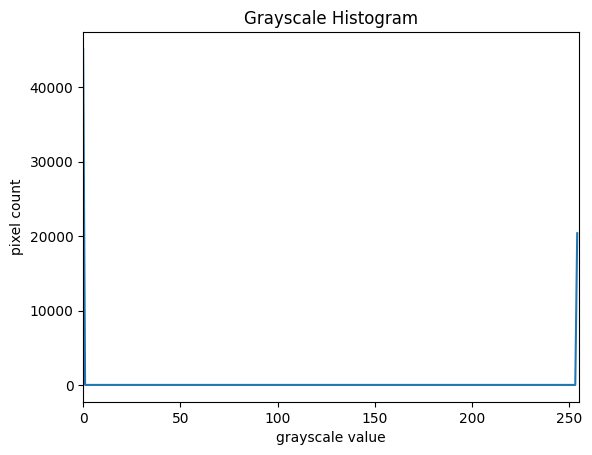

In [79]:
show_histogram(thres_image_5)

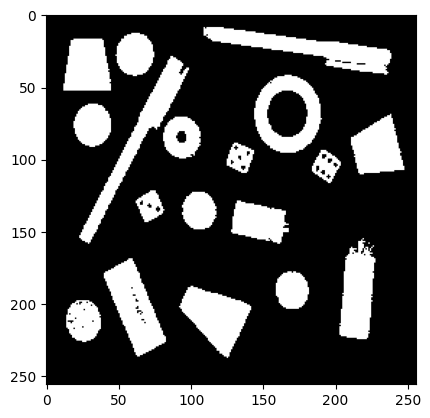

In [80]:
thres_value_6, thres_image_6 = cv2.threshold(noised_image_2.astype(np.uint8), 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(thres_image_6, cmap='gray', vmin=0, vmax=255)

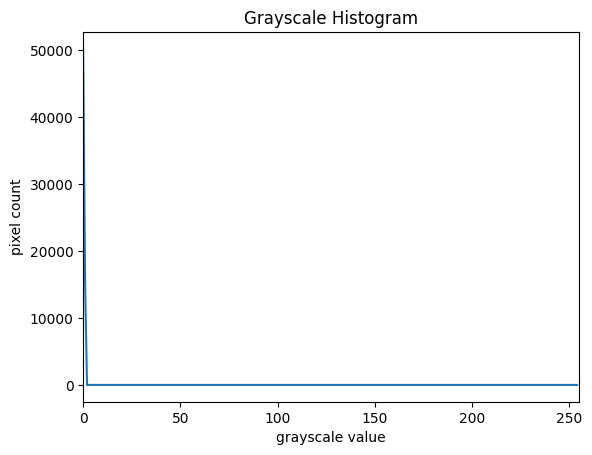

In [ ]:
show_histogram(thres_image_6)

### ¿Cómo afecta el ruido al resultado? 

En este caso, el ruido gaussiano afecta significativamente la umbralización, tanto global como de Otsu, especialmente en la imagen con una varianza de 0.05, donde la detección de contornos se vuelve deficiente y dificulta la visualización clara de los bordes. Por otro lado, en la imagen con una varianza de 0.001, la umbralización global no logra detectar algunos contornos, los cuales son más visibles al aplicar la umbralización de Otsu.

## Cargar imagen TEXT

In [3]:
imagen_text = cv2.imread('images/TEXT.png', cv2.IMREAD_GRAYSCALE)

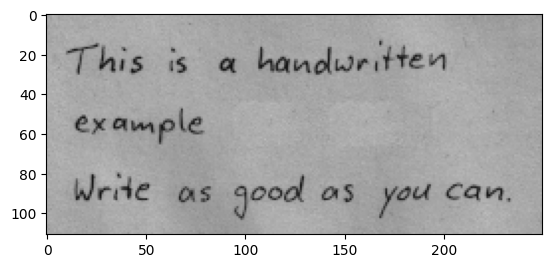

In [4]:
plt.imshow(imagen_text, cmap='gray', vmin=0, vmax=255)

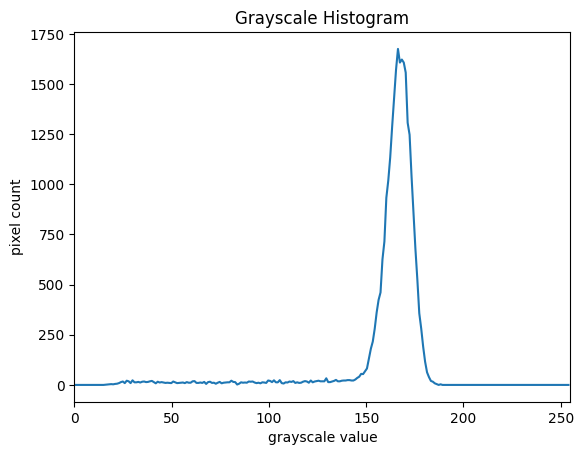

In [12]:
show_histogram(imagen_text)

## Sombra Circular Lateral

In [13]:
rows, cols = imagen_text.shape
x, y = np.meshgrid(np.arange(cols), np.arange(rows))
#Cálculo del centro
cx, cy = cols // 2, rows // 2  
#Cálculo del radio y distancia posible
distance = np.sqrt((x - cx) ** 2 + (y - cy) ** 2)
max_dist = np.sqrt(cx**2 + cy**2) 

#Aplicación del gradiente
text_shading = 1 - (distance / max_dist)  
text_image_som = imagen_text * text_shading
text_image_som = text_image_som.astype(np.uint8)

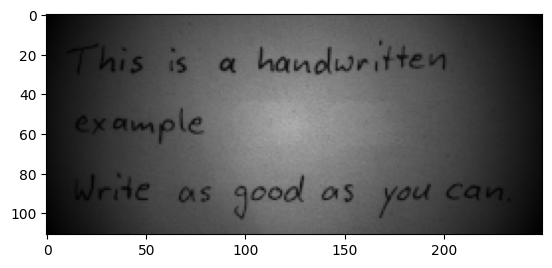

In [14]:
plt.imshow(text_image_som, cmap='gray', vmin=0, vmax=255)

## Sombras sinusoidales

In [15]:
# Cantidad de perturbaciones
frequency = 20  
#Intensidad de los picos
amplitude = 0.5

#Cálculo y aplicación del efecto
sinusoidal_shading = (1 + amplitude * np.sin(2 * np.pi * x / frequency)) / 1.5
sinusoidal_image = imagen_text * sinusoidal_shading

sinusoidal_image = sinusoidal_image.astype(np.uint8)

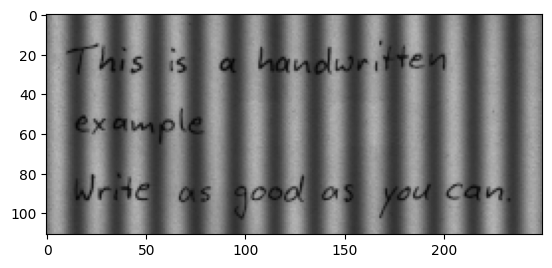

In [16]:
plt.imshow(sinusoidal_image, cmap='gray', vmin=0, vmax=255)

## Umbralización Otsu

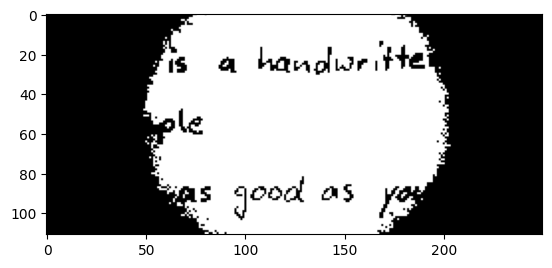

In [17]:
thres_value_7, thres_image_7 = cv2.threshold(text_image_som, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(thres_image_7, cmap='gray', vmin=0, vmax=255)

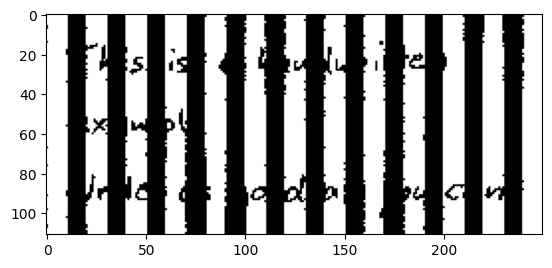

In [18]:
thres_value_8, thres_image_8 = cv2.threshold(sinusoidal_image, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(thres_image_8, cmap='gray', vmin=0, vmax=255)

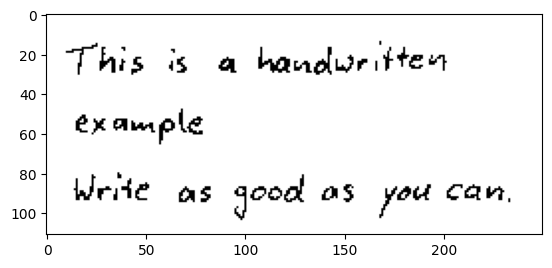

In [19]:
thres_value_10, thres_image_10 = cv2.threshold(imagen_text, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(thres_image_10, cmap='gray', vmin=0, vmax=255)

### ¿Qué sucede? ¿Por qué sucede esto? ¿Qué alternativas puede emplear para mitigar este resultado?

La umbralización de Otsu falla en estas imágenes debido a la iluminación no uniforme. En la primera, la sombra circular altera la distribución de intensidades, haciendo que parte del texto se pierda. En la segunda, las bandas sinusoidales generan franjas negras y blancas en la umbralización. Otsu basa su funcionamiento en la diferencia clara entre dos regiones de intensidad, pero la iluminación no uniforme dificulta esta separación y provoca una segmentación deficiente del texto. Una posible solución es aplicar técnicas de corrección de iluminación antes de la umbralización, como la sustracción de fondo o el filtrado gaussiano, para obtener una distribución de intensidad más homogénea.

## Umbralización local

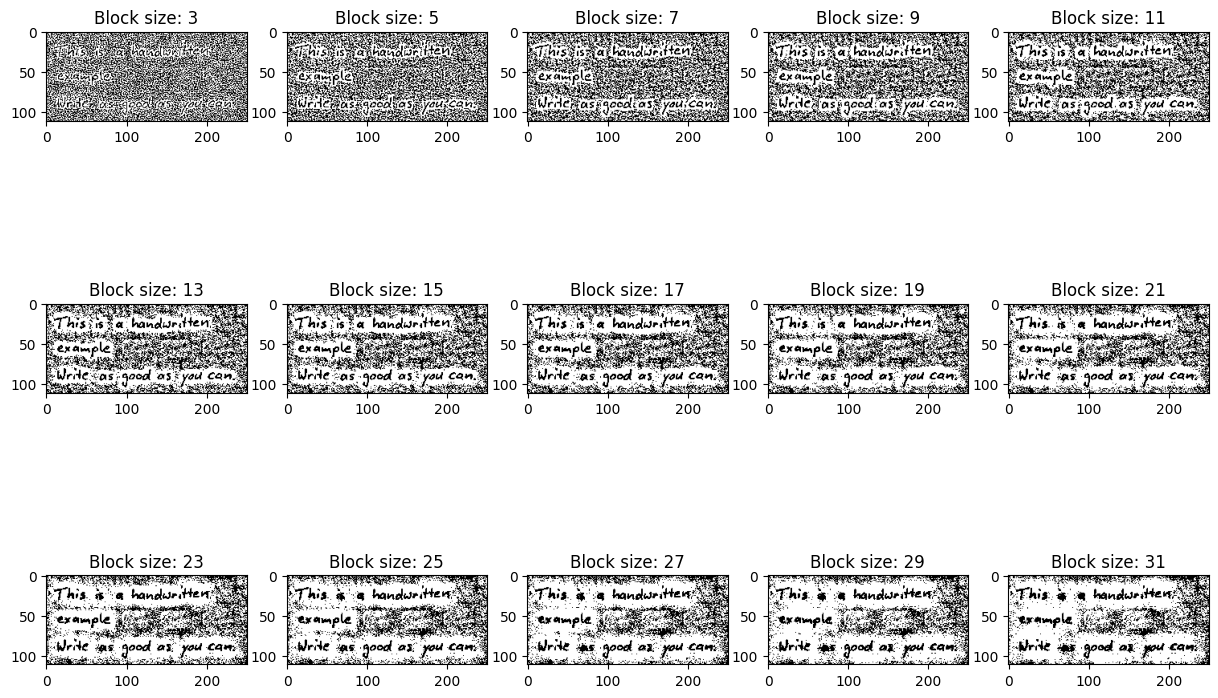

In [127]:
block_size = 21
block_list = [3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31]
threshold_list = []
for block_size in block_list:
  ti = threshold_local(imagen_text, block_size=block_size, method='mean')
  binary_image = imagen_text > ti
  thresholded_image = binary_image*255
  threshold_list.append(thresholded_image)

fig, axs = plt.subplots(3, 5, figsize=(15, 10))
axs = axs.ravel()
for i, ax in enumerate(axs.flat):
  ax.imshow(threshold_list[i], cmap='gray', vmin=0, vmax=255)
  ax.set_title(f'Block size: {block_list[i]}')
  

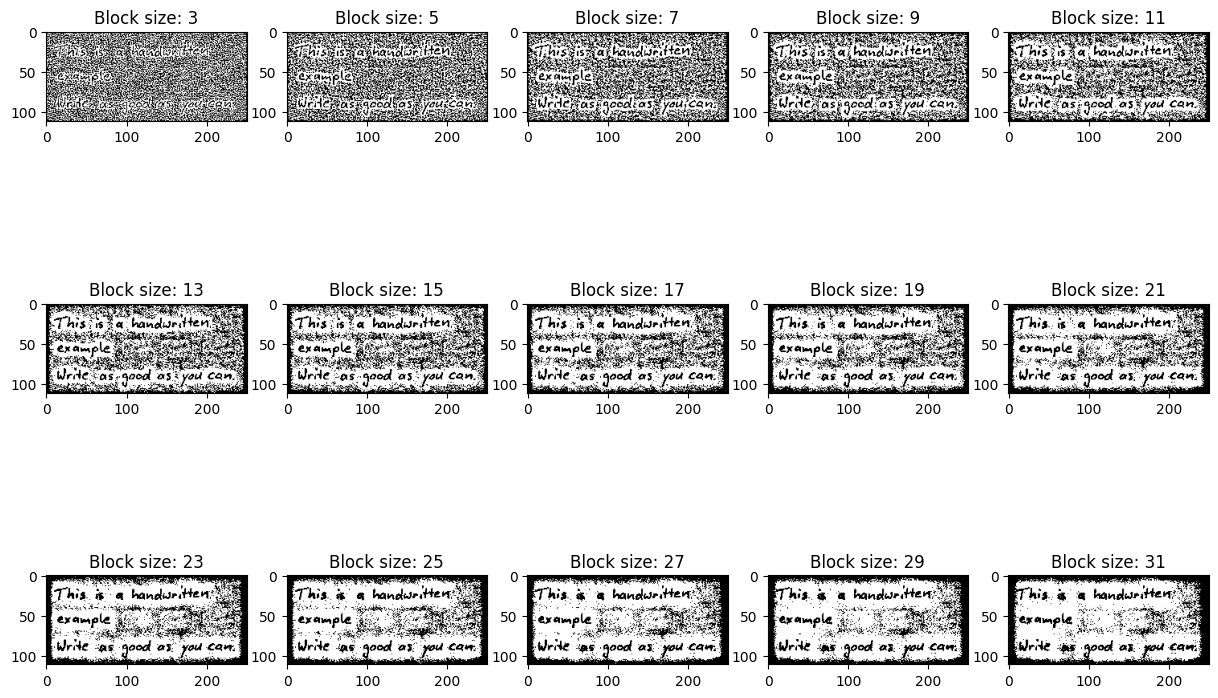

In [21]:
threshold_list = []
for block_size in block_list:
  ti = threshold_local(text_image_som, block_size=block_size, method='mean')
  binary_image = text_image_som > ti
  thresholded_image = binary_image*255
  threshold_list.append(thresholded_image)
  
fig, axs = plt.subplots(3, 5, figsize=(15, 10))
axs = axs.ravel()
for i, ax in enumerate(axs.flat):
  ax.imshow(threshold_list[i], cmap='gray', vmin=0, vmax=255)
  ax.set_title(f'Block size: {block_list[i]}')

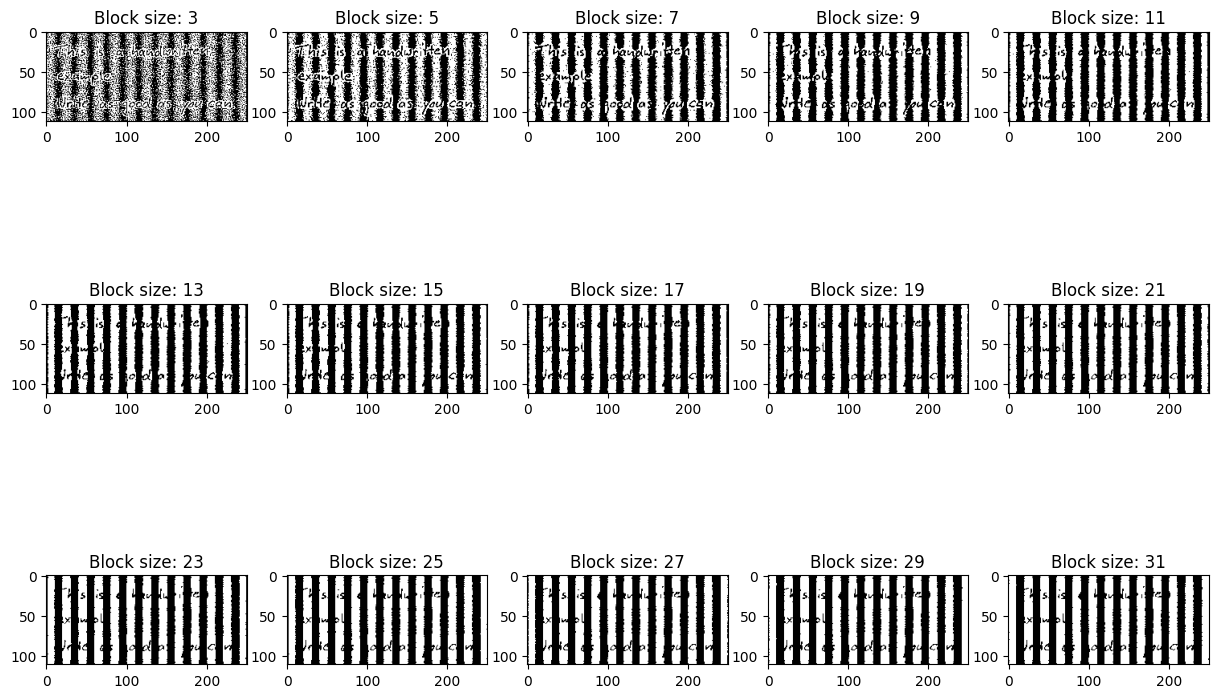

In [22]:
threshold_list = []
for block_size in block_list:
  ti = threshold_local(sinusoidal_image, block_size=block_size, method='mean')
  binary_image = sinusoidal_image > ti
  thresholded_image = binary_image*255
  threshold_list.append(thresholded_image)
  
fig, axs = plt.subplots(3, 5, figsize=(15, 10))
axs = axs.ravel()
for i, ax in enumerate(axs.flat):
  ax.imshow(threshold_list[i], cmap='gray', vmin=0, vmax=255)
  ax.set_title(f'Block size: {block_list[i]}')

### ¿En qué cambia el resultado con relación al método de Otsu? ¿Qué implicaciones tiene esto? ¿Cómo puede mejorar el resultado de la segmentación para reducir el ruido en ambos casos?

La umbralización local utilizando diferentes tamaños del vecindario alrededor de cada píxel (valores de 3 a 31) tiene una mejora considerable con respecto a Otsu porque permite adaptarse a variaciones de iluminación dentro de la imagen, en lugar de aplicar un umbral global. En el caso de la sombra circular, este método logra recuperar mejor el texto en diferentes regiones, evitando que la sombra oscurezca gran parte de la imagen. En el caso de las bandas sinusoidales, aunque aún se observan patrones no deseados, este método permite distinguir mejor el texto en comparación con Otsu.

Para mejorar el resultado de la segmentación en ambos casos, se pueden aplicar técnicas de preprocesamiento como la corrección de iluminación antes de la umbralización, como se mencionó anteriormente. Adicionalmente, en este caso, la detección de contornos en la imagen original fue más efectiva utilizando Otsu en comparación con la umbralización local que introdujo una cantidad considerable de ruido.